In [68]:
import json

def read_json(file):
    with open(file) as f:
        data = json.load(f)
    return data

data = read_json("../drivelm/challenge/test_eval.json")
# results = read_json("./redcircle/outputs/test-eval-idefics2-8b-fine-tuned-redcircle-super-jazz-16-200step.json")
results = read_json("./vip-llava/outputs/test-eval-vip-llava-7b-zero-shot-visual-cue-vb.json")

In [69]:
from termcolor import colored
import matplotlib.pyplot as plt
from PIL import Image

IMAGE_DIR_PREFIX = "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/cs503-project/data/train"

y_view_mapping = {"MIDDLE": 1, "LEFT": 0, "RIGHT": 2}

def display_next_prediction(data, results):
    results_map = {}

    for result in results:
        results_map[result["id"]] = result

    for scene_id, scene in data.items():
        frames = scene["key_frames"]

        for frame_id, frame in frames.items():
            qa = frame["QA"]
            image_paths = frame["image_paths"]
            tasks = ["perception", "prediction", "planning", "behavior"]

            for ti, task in enumerate(tasks):
                for qj, question in enumerate(qa[task]):
                    offset = sum([len(qa[t]) for t in tasks[:ti]])
                    question_id = f"{scene_id}_{frame_id}_{qj+offset}"
                    result = results_map[question_id]
                    print(f"{colored('Scene:', 'blue')} {scene_id}")
                    print(f"{colored('Frame:', 'blue')} {frame_id}")
                    print(f"{colored('Task:', 'blue')} {task}")
                    print(f"{colored('Question:', 'blue')} {question['Q']}")
                    print(f"{colored('Answer:', 'blue')} {question['A']}")
                    print(f"{colored('Model Input:', 'blue')} {result['question_text']}")
                    print(f"{colored('Model Output:', 'blue')} {result['answer']}")
                    print(f"{colored('Images:', 'blue')}")
                    
                    fig, axes = plt.subplots(2, 3, figsize=(30, 10))
                    for i, (image_view, image_path) in enumerate(image_paths.items()):
                        image_path = image_path.replace("..", IMAGE_DIR_PREFIX)
                        image = Image.open(image_path)
                        _, x, y = f"{image_view}_MIDDLE".split("_")[:3]
                        x_id = int(x == 'BACK')
                        axes[x_id][y_view_mapping[y]].imshow(image)
                        axes[x_id][y_view_mapping[y]].set_title(image_view)
                        axes[x_id][y_view_mapping[y]].axis('off')
                    yield
            
            print()

In [70]:
predictions = iter(display_next_prediction(data, results))

Scene: f0f120e4d4b0441da90ec53b16ee169d
Frame: 4a0798f849ca477ab18009c3a20b7df2
Task: planning
Question: What actions could the ego vehicle take based on <c1,CAM_BACK,1088.3,497.5>? Why take this action and what's the probability?
Answer: The action is to keep going at the same speed. The reason is to follow the traffic rules, which has a high probability.
Model Input: What actions could the ego vehicle take based on <c1,CAM_BACK,1088.3,497.5>? Why take this action and what's the probability?
Model Output: The ego vehicle could take the action of stopping or slowing down based on the object marked with red circle. The object marked with red circle is a traffic light, which indicates that the vehicle is approaching an intersection. The traffic light is red, which means that the vehicle should stop or slow down to avoid a collision with other vehicles or pedestrians. The probability of the ego vehicle taking this action is high, as it is a standard traffic rule to follow traffic signals.

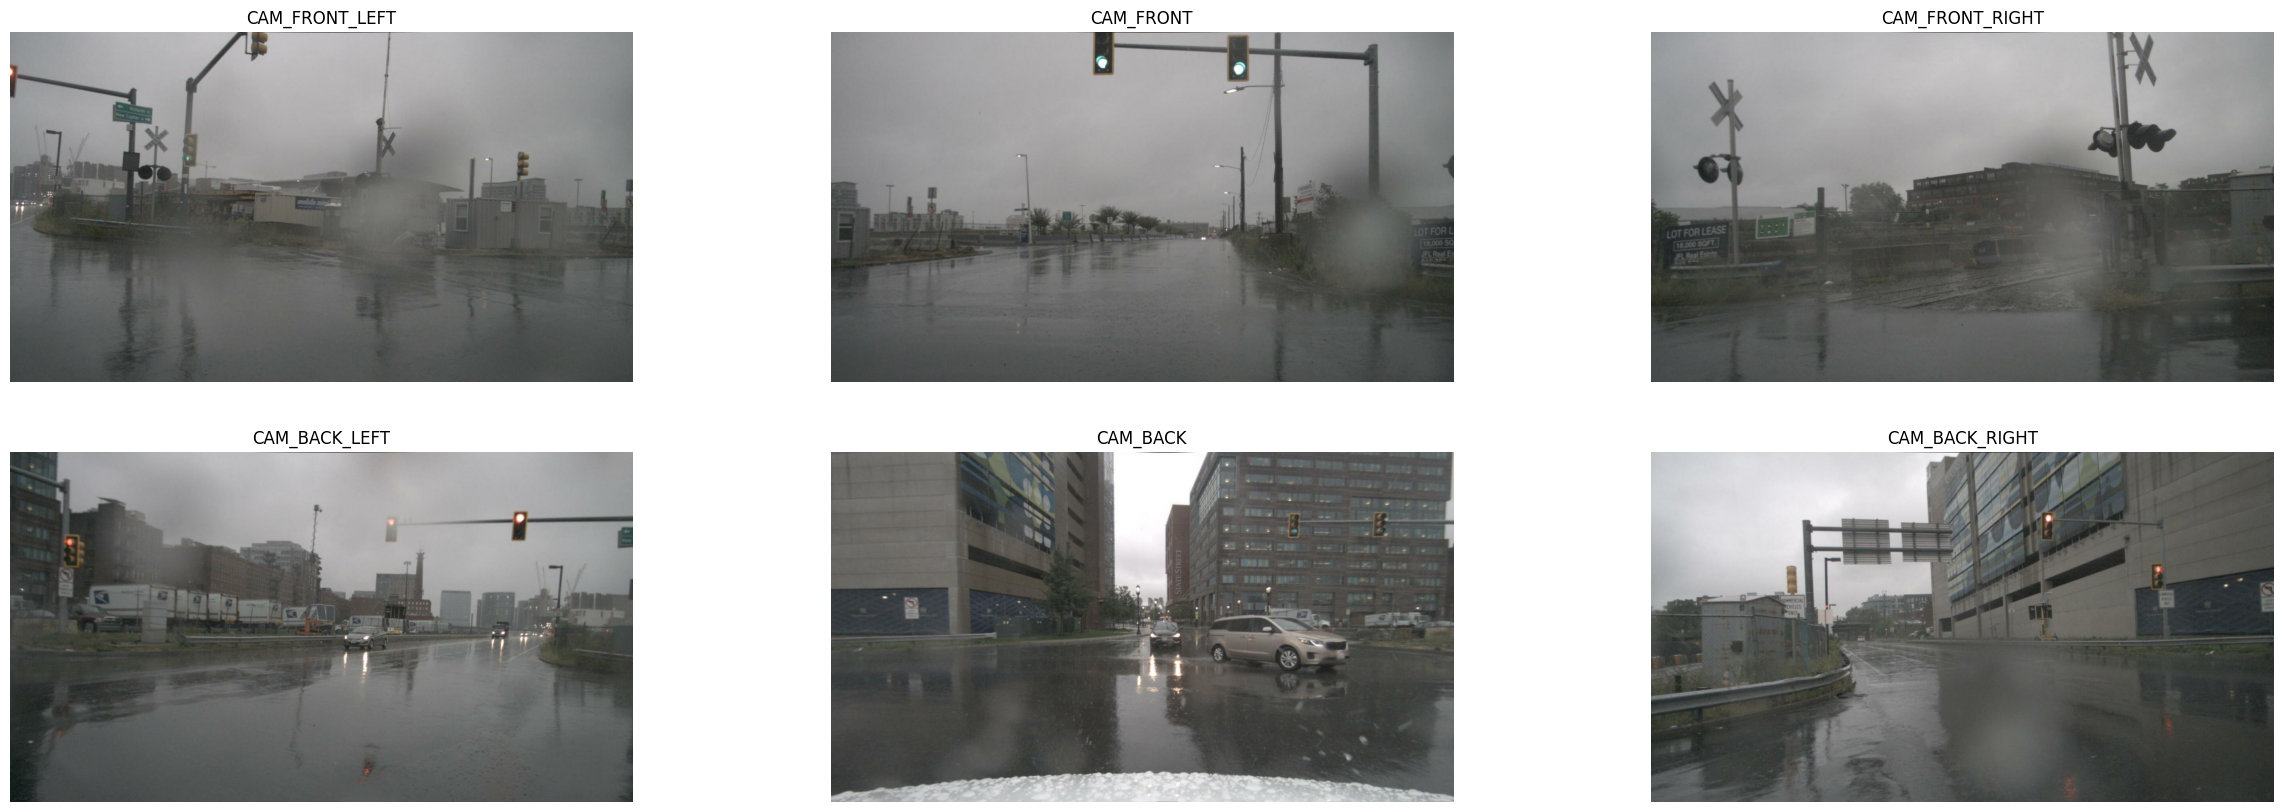

In [75]:
next(predictions)